<a href="https://colab.research.google.com/github/agord1994/MLA_ASG/blob/main/FinalProject_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source Link: https://www.kaggle.com/datasets/mirichoi0218/insurance


# Machine Learning Assignment-Final Project#  
**Andrew Gordon**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

###Logistic Regression

In [ ]:
hospital_df=pd.read_csv('/content/gdrive/MyDrive/CS430/insurance.csv')

### Statistical and Visual Exploration

In [ ]:
hospital_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
hospital_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
hospital_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


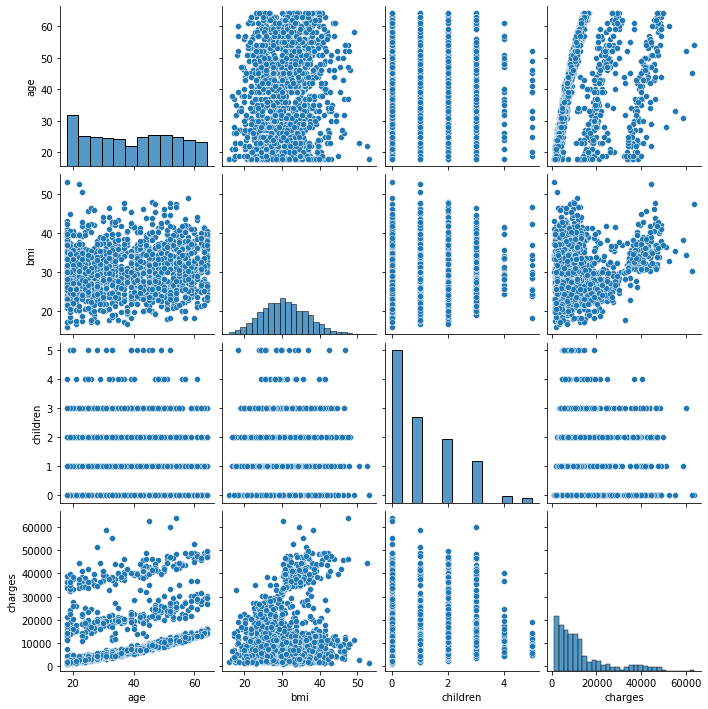

In [ ]:
sns.pairplot(hospital_df)

In [ ]:
amountofsmoker=hospital_df['smoker'].groupby(hospital_df['smoker']).count()
amountofsmoker

smoker
no     1064
yes     274
Name: smoker, dtype: int64

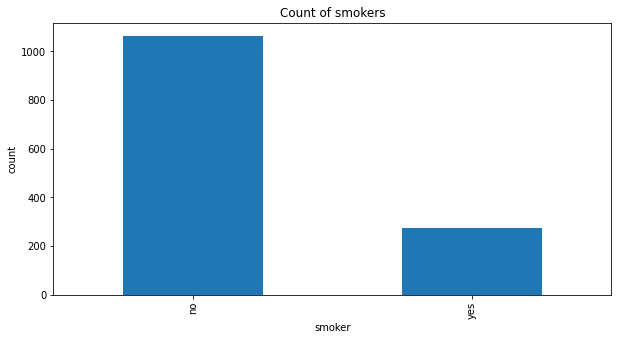

In [ ]:
amountofsmoker.plot(kind="bar", x="smoker",y="amountofsmoker",xlabel="smoker", ylabel="count", title="Count of smokers",figsize=(10,5))

In [ ]:
amountofgender=hospital_df['sex'].groupby(hospital_df['sex']).count()
amountofgender

sex
female    662
male      676
Name: sex, dtype: int64

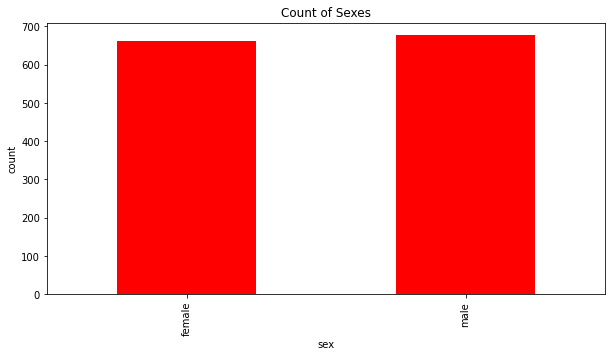

In [ ]:
amountofgender.plot(kind="bar",color='red', x="sex",y="amountofgender",xlabel="sex", ylabel="count", title="Count of Sexes",figsize=(10,5))

In [ ]:
amountofpeopleinregion=hospital_df['region'].groupby(hospital_df['region']).count()
amountofpeopleinregion

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

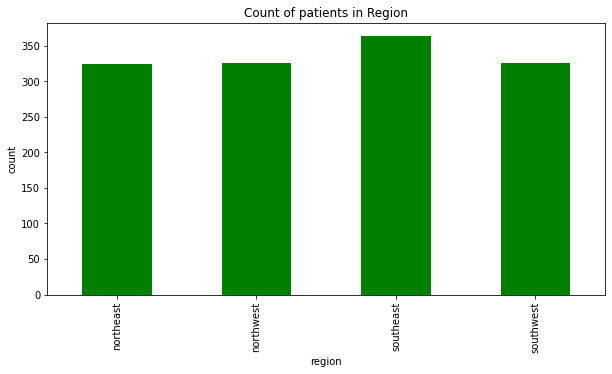

In [ ]:
amountofpeopleinregion.plot(kind="bar",color='green', x="region",y="amountofpeopleinregion",xlabel="region", ylabel="count", title="Count of patients in Region",figsize=(10,5))

### Splitting Data into Train/Test

In [ ]:
X=hospital_df[['age','sex','bmi','children','region','charges']] #putting variables into X data frame- leaving off car names because most values are unique
y=hospital_df[['smoker']]# putting smoker into y data frame- this is variable we are trying to predict


In [ ]:
y

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.20,random_state=0)#splitting up data into 4 dataframes. test data frames will have 20% of data to check validity of training sets

In [ ]:
X_train

,age,sex,bmi,children,region,charges
621,37,male,34.100,4,southwest,40182.24600
194,18,male,34.430,0,southeast,1137.46970
240,23,female,36.670,2,northeast,38511.62830
1168,32,male,35.200,2,southwest,4670.64000
1192,58,female,32.395,1,northeast,13019.16105
...,...,...,...,...,...,...
763,27,male,26.030,0,northeast,3070.80870
835,42,male,35.970,2,southeast,7160.33030
1216,40,male,25.080,0,southeast,5415.66120
559,19,male,35.530,0,northwest,1646.42970


In [ ]:
y_train

,smoker
621,yes
194,no
240,yes
1168,no
1192,no
...,...
763,no
835,no
1216,no
559,no


### Building the Pipeline

In [ ]:
num_attribs= ['age','bmi','children','charges']

In [ ]:
cat_attribs=['sex','region']

In [ ]:
col_transform = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(),cat_attribs),
    ('num',MinMaxScaler(),num_attribs),]
    )

#col_transform=ColumnTransformer(transformers=[('cat',OneHotEncoder(),cat_attribs),('num',MinMaxScaler(),num_attribs)], remainder='passthrough')


In [ ]:
pipeline= Pipeline([
    ('transform', col_transform),
    ('mlr',LogisticRegression(max_iter=1000)),
])

In [ ]:
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'region']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'children',
                                                   'charges'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

###Executing the Model

In [ ]:
X_train

,age,sex,bmi,children,region,charges
621,37,male,34.100,4,southwest,40182.24600
194,18,male,34.430,0,southeast,1137.46970
240,23,female,36.670,2,northeast,38511.62830
1168,32,male,35.200,2,southwest,4670.64000
1192,58,female,32.395,1,northeast,13019.16105
...,...,...,...,...,...,...
763,27,male,26.030,0,northeast,3070.80870
835,42,male,35.970,2,southeast,7160.33030
1216,40,male,25.080,0,southeast,5415.66120
559,19,male,35.530,0,northwest,1646.42970


In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'region']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'children',
                                                   'charges'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

###Evaluating the Model

In [ ]:
y_pred=pipeline.predict(X_test)

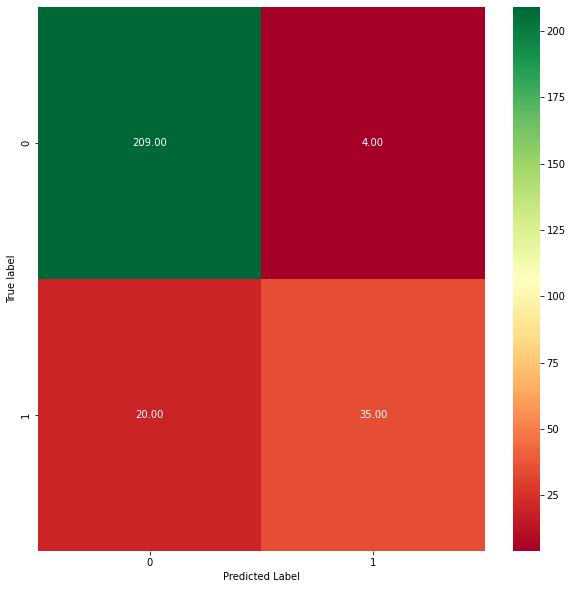

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print("recall score:",recall_score(y_test,y_pred,pos_label="yes"))
print("precision score:",precision_score(y_test,y_pred,pos_label="yes"))
print("f1 score:",f1_score(y_test,y_pred,pos_label="yes"))

recall score: 0.6363636363636364
precision score: 0.8974358974358975
f1 score: 0.7446808510638298


large class imbalance in dataset so we should use the precision recall curve

In [ ]:
y_pred_proba=pipeline.predict_proba(X_test)

In [ ]:
y_pred_proba=pipeline.predict_proba(X_test)[:,1]

In [ ]:
lr_precision,lr_recall,_ =precision_recall_curve(y_test,y_pred_proba,pos_label="yes")

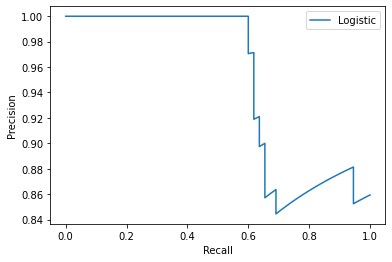

In [ ]:
plt.plot(lr_recall,lr_precision,label="Logistic")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

In [ ]:
auc(lr_recall,lr_precision)

0.9487676412726944

###Conclusion

The precsision score for the logisitic regression is fairly high at .89, whereas the recall score is .63 which is not great. The AUC measures how well a model is able to distinguish between classes. In this case, how well our model classifies someone as a smoker. 94%  is very good. 

Problem 2-Decision Tree

### Splitting Data into Train/Test

used same data and variables from above 

###Building the Pipeline

In [ ]:
pipeline1= Pipeline([
    ('transform', col_transform),
    ('decision_tree',tree.DecisionTreeClassifier(max_depth=5)),
])

###Executing the Model

In [ ]:
pipeline1.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'region']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'children',
                                                   'charges'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

###Evaluating the Model

In [ ]:
y_pred=pipeline1.predict(X_test)

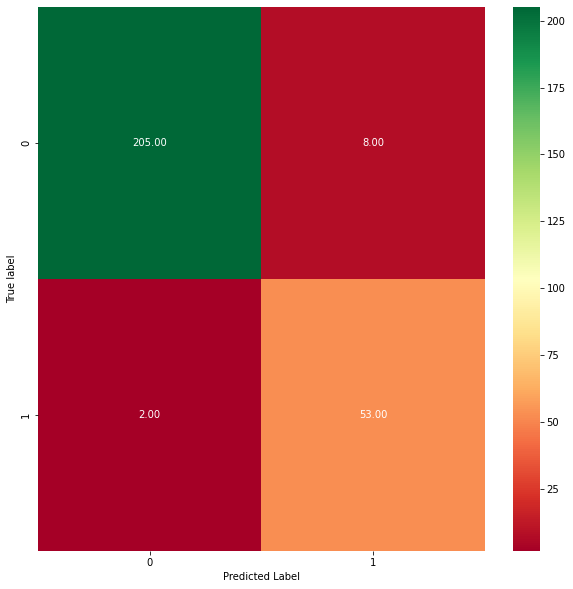

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
param_grid= {'decision_tree__criterion': ['gini','entropy'],'decision_tree__max_depth':[5,10,15,20]}

In [ ]:
grid_pipeline=GridSearchCV(pipeline1,param_grid)

In [ ]:
grid_pipeline.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'region']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children',
                                                                          'charges'])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [5, 10, 15, 20]})

In [ ]:
grid_pipeline.best_params_

{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 10}

In [ ]:

pipeline2= Pipeline([
    ('transform', col_transform),
    ('decision_tree',tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)),
])


In [ ]:
pipeline2.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'region']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'bmi', 'children',
                                                   'charges'])])),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

###Evaluating adjusted hyperparameters with Gridsearch

In [ ]:
y_pred=pipeline2.predict(X_test)

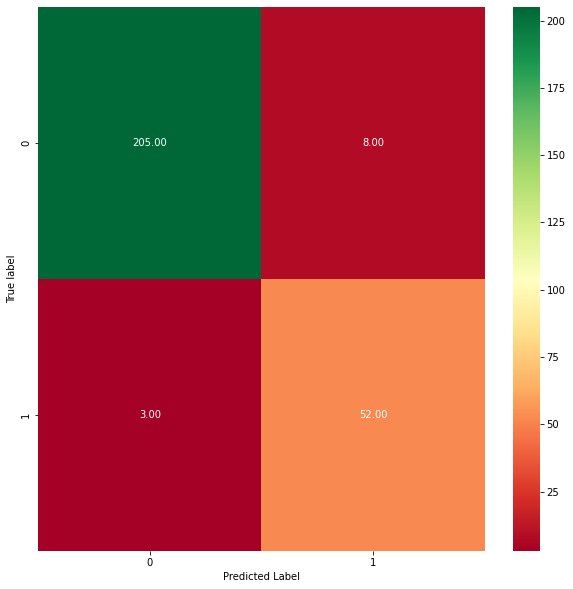

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print("recall score:",recall_score(y_test,y_pred,pos_label="yes"))
print("precision score:",precision_score(y_test,y_pred,pos_label="yes"))
print("f1 score:",f1_score(y_test,y_pred,pos_label="yes"))

recall score: 0.9454545454545454
precision score: 0.8666666666666667
f1 score: 0.9043478260869566


In [ ]:
y_pred_probadt=pipeline2.predict_proba(X_test)

In [ ]:
y_pred_probadt=pipeline2.predict_proba(X_test)[:,1]

In [ ]:
dt_precision,dt_recall,_ =precision_recall_curve(y_test,y_pred_probadt,pos_label="yes")

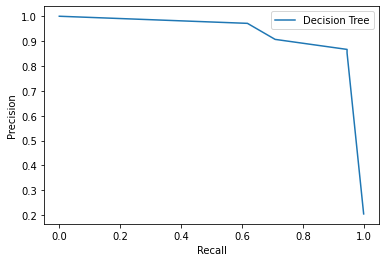

In [ ]:
plt.plot(dt_recall,dt_precision,label="Decision Tree")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

###Conclusion

After running a logistic regression, the next step was to compare it to another classification algorithm ML model. The section above shows the same data set run with decision trees to see the model improves. Turns out once the hyperparameters were properly chosen using a GridSearch pipeline then the model became more accurate in classifying smokers from non-smokers. The recall score was .94 and precision score was .86 making the decision tree model better at predicting non-smokers and smokers than the logisitic regression model. 